## TECH GADGET SUCCESS PREDICTION

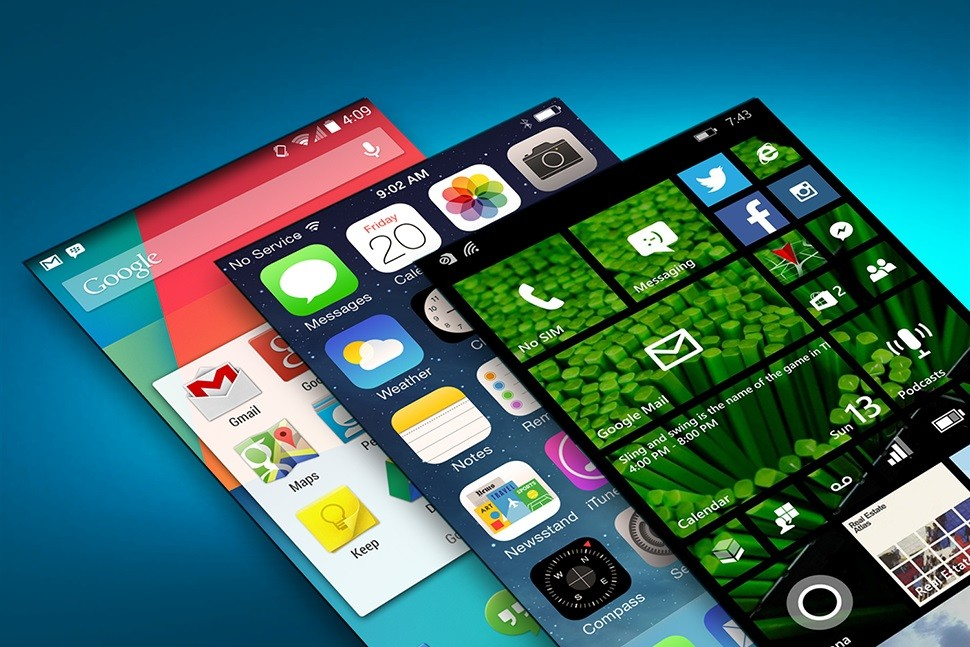

## About Dataset
These dataset focused on predicting the success of a new tech gadget based on various features? This dataset will include records of different gadgets released over the past few years with their attributes and success metrics.

Dataset Description:-
*Gadget ID: Unique identifier for each gadget.*

*Launch Date: The date when the gadget was launched.*

*Company: The company name of the gadget.*

*Gadget type: Type of the gadget (e.g., Smartphone, Laptop, Smartwatch).*

*Price: Price at launch (in USD).*

*Battery Life: Average battery life (in hours).*

*Screen Size: Size of the screen (in inches).*

*Storage Capacity: Storage capacity (in GB).*

*RAM: RAM size (in GB).*

*Camera Quality: Quality of the camera (in megapixels).*

*Operating System: Operating system (e.g., Android, iOS, Windows).*

*Weight: Weight of the gadget (in grams).*

*User Ratings: Average user rating (out of 5).*

*Sales Volume: Number of units sold in the first year.*

*Success: Success metric (0 for Not Successful, 1 for Successful).*

*Problem Objective:-*

*The objective is to predict whether a new tech gadget will be successful based on its features.*

## Overall Objectives:

1.  Market Landscape Analysis: Understand the overall gadget market structure, identifying key players, popular gadgets, and trends over time.

2.	Feature Value Assessment: Determine how different gadget specifications (RAM, Storage, Camera, etc.) relate to key performance indicators like Price, User Ratings, and Sales Volume.

3.	Success Factor Identification: Identify the key drivers (features, brand, pricing, category) that correlate with or predict gadget success (as defined by the Success metric, Sales Volume, or User Ratings).

4.	Company & Gadget Type Benchmarking: Compare the performance, pricing strategies, and feature sets of different companies and gadget types.

5.	User Satisfaction Analysis: Explore which factors contribute most significantly to higher user ratings.


## Research Questions

1.	RQ: How has the number of gadget launches changed over time? 
2.	RQ: Which Company's have launched the most gadgets? 
3.	RQ: How does Price correlate with technical specifications like RAM, Storage Capacity, Screen Size, Camera Quality, and Battery Life?
4.	RQ: How does Sales volume correlate with technical specifications like RAM, Storage Capacity, Screen Size, Camera Quality, and Battery Life?
5.	RQ: How do specs like RAM and Storage Capacity typically vary across all Operating Systems? 
6.	RQ: Are certain Company's or Gadget Types more associated with successful gadgets? 
7.	RQ: Which features (Price, Battery Life, RAM, etc.) show significant differences between successful (Success=1) and unsuccessful (Success=0) gadgets?
8.	RQ: How does the average Price differ across Company's and Gadget Type? 
9.	RQ: Do specific Company dominate sales within particular Gadget type? 
10.	RQ: Which features (Battery Life, Screen Size, Camera Quality, Weight) correlate most strongly with User Ratings? 

In [7]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

In [8]:
# importing our dataset
tech = pd.read_excel("gadget.xlsx")

In [11]:
# calling out our dataset
tech

Gadget ID Launch Date    Brand    Category  Price  Battery Life  \
0           1  2022-08-02  Brand A      Laptop   1226            38   
1           2  2019-08-17  Brand B      Tablet   1559            14   
2           3  2019-02-21  Brand A      Laptop    960            40   
3           4  2020-07-17  Brand C      Tablet   1394            18   
4           5  2020-05-16  Brand D      Tablet   1230            35   
..        ...         ...      ...         ...    ...           ...   
95         96  2022-11-10  Brand A  Smartphone   1600            10   
96         97  2022-02-14  Brand B      Laptop    802            32   
97         98  2020-03-25  Brand C  Smartwatch    501            32   
98         99  2022-11-03  Brand D  Smartwatch    829            48   
99        100  2020-10-26  Brand B      Laptop   1679            48   

    Screen Size  Storage Capacity  RAM  Camera Quality Operating System  \
0           7.7               512   16              93              iOS   
1          15.1                32   16              61          Windows   
2           6.2                 8    6              68          Windows   
3           3.0                 8    4              75              iOS   
4           6.7                64   32              15          Windows   
..          ...               ...  ...             ...              ...   
95         16.9                 8    8              95          Android   
96          3.8                64   16              36              iOS   
97          1.3               128    6              11          Android   
98          8.9                64    8              54              iOS   
99          3.9                 8   32              12          Android   

    Weight  User Ratings  Sales Volume  Success  
0     2376           3.1         62886        0  
1     2314           2.7         76745        1  
2     2964           4.2         84251        1  
3      922           4.9         95456        0  
4     1871           3.2         54413        0  
..     ...           ...           ...      ...  
95     239           3.5         35674        1  
96     554           4.9         36854        0  
97    1264           3.4         47271        0  
98    1581           3.5         74688        1  
99     873           3.2         39518        0  

[100 rows x 15 columns]

In [13]:
# inspecting the dataset
tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gadget ID         100 non-null    int64  
 1   Launch Date       100 non-null    object 
 2   Brand             100 non-null    object 
 3   Category          100 non-null    object 
 4   Price             100 non-null    int64  
 5   Battery Life      100 non-null    int64  
 6   Screen Size       100 non-null    float64
 7   Storage Capacity  100 non-null    int64  
 8   RAM               100 non-null    int64  
 9   Camera Quality    100 non-null    int64  
 10  Operating System  100 non-null    object 
 11  Weight            100 non-null    int64  
 12  User Ratings      100 non-null    float64
 13  Sales Volume      100 non-null    int64  
 14  Success           100 non-null    int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 11.8+ KB


In [15]:
# checking for our rows and columns
tech.shape

(100, 15)

We can see that we have 100 rows and 15 columns

In [18]:
# checking our column names
tech.columns

Index(['Gadget ID', 'Launch Date', 'Brand', 'Category', 'Price',
       'Battery Life', 'Screen Size', 'Storage Capacity', 'RAM',
       'Camera Quality', 'Operating System', 'Weight', 'User Ratings',
       'Sales Volume', 'Success'],
      dtype='object')

# DATA CLEANING PROCESS

In [22]:
# checking for duplicates
tech.duplicated().sum()

0

In [24]:
# checking for datatypes
tech.dtypes

Gadget ID             int64
Launch Date          object
Brand                object
Category             object
Price                 int64
Battery Life          int64
Screen Size         float64
Storage Capacity      int64
RAM                   int64
Camera Quality        int64
Operating System     object
Weight                int64
User Ratings        float64
Sales Volume          int64
Success               int64
dtype: object

In [26]:
tech.head()

Gadget ID Launch Date    Brand Category  Price  Battery Life  Screen Size  \
0          1  2022-08-02  Brand A   Laptop   1226            38          7.7   
1          2  2019-08-17  Brand B   Tablet   1559            14         15.1   
2          3  2019-02-21  Brand A   Laptop    960            40          6.2   
3          4  2020-07-17  Brand C   Tablet   1394            18          3.0   
4          5  2020-05-16  Brand D   Tablet   1230            35          6.7   

   Storage Capacity  RAM  Camera Quality Operating System  Weight  \
0               512   16              93              iOS    2376   
1                32   16              61          Windows    2314   
2                 8    6              68          Windows    2964   
3                 8    4              75              iOS     922   
4                64   32              15          Windows    1871   

   User Ratings  Sales Volume  Success  
0           3.1         62886        0  
1           2.7         76745        1  
2           4.2         84251        1  
3           4.9         95456        0  
4           3.2         54413        0

In [28]:
# checking for unique items in the dataset
tech["Brand"].unique()
tech["Storage Capacity"].unique()

array([512,  32,   8,  64, 256, 128,  16], dtype=int64)

In [30]:
# replacing spaces in the column names
tech.columns = tech.columns.str.upper().str.replace(" ", "_")

In [32]:
## calling out the tech columns
tech.columns

Index(['GADGET_ID', 'LAUNCH_DATE', 'BRAND', 'CATEGORY', 'PRICE',
       'BATTERY_LIFE', 'SCREEN_SIZE', 'STORAGE_CAPACITY', 'RAM',
       'CAMERA_QUALITY', 'OPERATING_SYSTEM', 'WEIGHT', 'USER_RATINGS',
       'SALES_VOLUME', 'SUCCESS'],
      dtype='object')

In [34]:
## calling out the Brands
tech["BRAND"]

0     Brand A
1     Brand B
2     Brand A
3     Brand C
4     Brand D
       ...   
95    Brand A
96    Brand B
97    Brand C
98    Brand D
99    Brand B
Name: BRAND, Length: 100, dtype: object

In [36]:
## datatypes for each column
tech.dtypes

GADGET_ID             int64
LAUNCH_DATE          object
BRAND                object
CATEGORY             object
PRICE                 int64
BATTERY_LIFE          int64
SCREEN_SIZE         float64
STORAGE_CAPACITY      int64
RAM                   int64
CAMERA_QUALITY        int64
OPERATING_SYSTEM     object
WEIGHT                int64
USER_RATINGS        float64
SALES_VOLUME          int64
SUCCESS               int64
dtype: object

In [38]:
# changing the datatypes
tech["GADGET_ID"] = tech["GADGET_ID"].astype("object")
tech["LAUNCH_DATE"] = pd.to_datetime(tech["LAUNCH_DATE"])
tech["BRAND"] = tech["BRAND"].astype("category")
tech["CATEGORY"] = tech["CATEGORY"].astype("category")
tech["STORAGE_CAPACITY"] = tech["STORAGE_CAPACITY"].astype("category")
tech["RAM"] = tech["RAM"].astype("category")
tech["OPERATING_SYSTEM"] = tech["OPERATING_SYSTEM"].astype("category")
tech["SUCCESS"] = tech["SUCCESS"].astype("category")

In [40]:
## datatypes for each column
tech.dtypes

GADGET_ID                   object
LAUNCH_DATE         datetime64[ns]
BRAND                     category
CATEGORY                  category
PRICE                        int64
BATTERY_LIFE                 int64
SCREEN_SIZE                float64
STORAGE_CAPACITY          category
RAM                       category
CAMERA_QUALITY               int64
OPERATING_SYSTEM          category
WEIGHT                       int64
USER_RATINGS               float64
SALES_VOLUME                 int64
SUCCESS                   category
dtype: object

In [42]:
## changing column name
tech.rename({'BRAND':'COMPANY'},axis = 1, inplace = True)
tech.rename({'CATEGORY':'GADGET_TYPE'},axis = 1, inplace = True)

In [44]:
tech.columns

Index(['GADGET_ID', 'LAUNCH_DATE', 'COMPANY', 'GADGET_TYPE', 'PRICE',
       'BATTERY_LIFE', 'SCREEN_SIZE', 'STORAGE_CAPACITY', 'RAM',
       'CAMERA_QUALITY', 'OPERATING_SYSTEM', 'WEIGHT', 'USER_RATINGS',
       'SALES_VOLUME', 'SUCCESS'],
      dtype='object')

In [46]:
tech['COMPANY'] = tech['COMPANY'].replace({'Brand A': 'Company A', 'Brand B': 'Company B', 'Brand C': 'Company C', 'Brand D': 'Company D'})


In [48]:
tech['COMPANY'].unique()

['Company A', 'Company B', 'Company C', 'Company D']
Categories (4, object): ['Company A', 'Company B', 'Company C', 'Company D']

## EXPLORATORY DATA ANALYSIS (EDA)

In [51]:
# summary statistics
tech.describe()


LAUNCH_DATE        PRICE  BATTERY_LIFE  SCREEN_SIZE  \
count                  100   100.000000    100.000000   100.000000   
mean   2020-12-25 02:52:48  1072.580000     28.690000     9.222000   
min    2019-01-14 00:00:00   113.000000      5.000000     1.000000   
25%    2019-12-13 00:00:00   649.000000     17.750000     5.300000   
50%    2020-11-23 12:00:00  1098.000000     30.000000     8.850000   
75%    2022-02-16 06:00:00  1519.000000     40.000000    13.000000   
max    2022-12-13 00:00:00  1999.000000     49.000000    17.000000   
std                    NaN   532.161652     13.500239     4.561977   

       CAMERA_QUALITY       WEIGHT  USER_RATINGS  SALES_VOLUME  
count      100.000000   100.000000    100.000000    100.000000  
mean        52.760000  1474.220000      2.961000  48533.970000  
min          0.000000    88.000000      1.100000   1055.000000  
25%         24.500000   802.250000      2.000000  22802.000000  
50%         49.500000  1415.000000      2.900000  46636.500000  
75%         84.500000  2134.250000      4.000000  74686.500000  
max        104.000000  2988.000000      5.000000  98239.000000  
std         31.967825   798.391319      1.184487  29167.309246

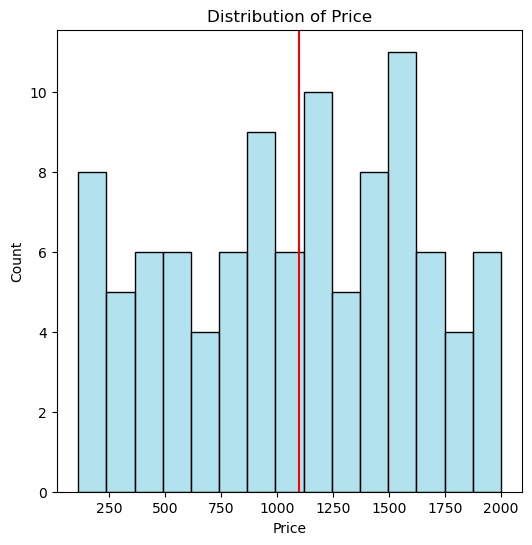

In [53]:
plt.figure(figsize=(6, 6))

# Seaborn histogram
sns.histplot(data=tech, x="PRICE", bins=15, color="#9aD9EA")  # Change color here

plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.axvline(1098, color='red')  # Keep the red vertical line

plt.show()

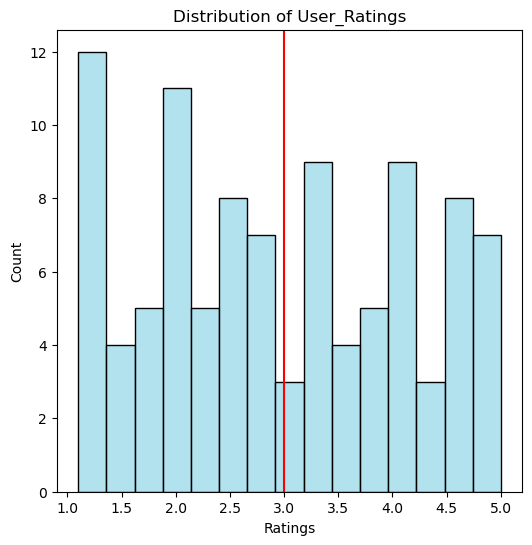

In [54]:
# plotting a histogram for the distribution of the user rating
plt.figure(figsize=(6, 6))

# Seaborn histogram 
sns.histplot(data=tech, x="USER_RATINGS", bins=15, color="#9aD9EA")  # Change color here
plt.title("Distribution of User_Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.axvline(3.0, color='red')  # Keep the red vertical line
plt.show()

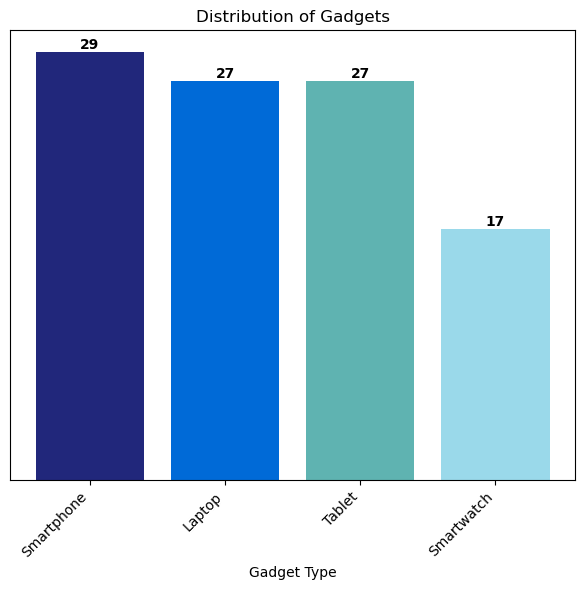

In [57]:
# Count the number of gadgets in each GADGET_TYPE

gadget_counts = tech['GADGET_TYPE'].value_counts().reset_index()
gadget_counts.columns = ['GADGET_TYPE', 'count']

# Create bar chart
plt.figure(figsize=(6, 6))
plt.bar(gadget_counts['GADGET_TYPE'], gadget_counts['count'], 
        color=["#21277B", "#006aD7", "#5FB3B1", "#9aD9EA"])

# Add data labels
for i, value in enumerate(gadget_counts['count']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontweight='bold')

# Title and labels
plt.title("Distribution of Gadgets")
plt.xlabel("Gadget Type")
plt.ylabel("")

# Remove y-axis values
plt.gca().axes.get_yaxis().set_visible(False)

# Improve layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Findings and Insights
•	With 29 counts, smartphones top the list, suggesting they might be the most in-demand or frequently analyzed tech product in the dataset.

•	Laptop and Tablet Both have 27 counts, showing similar popularity or usage frequency. This might indicate interchangeable roles or balanced interest in both types of devices.

•	At 17 counts, smartwatches have the lowest value among the four gadgets, possibly highlighting lower usage, interest, or market penetration compared to others

•	The top three (smartphone, laptop, tablet) are close in count, indicating a diverse interest across devices. This could suggest opportunities for businesses or analysts to focus on all three rather than just one.


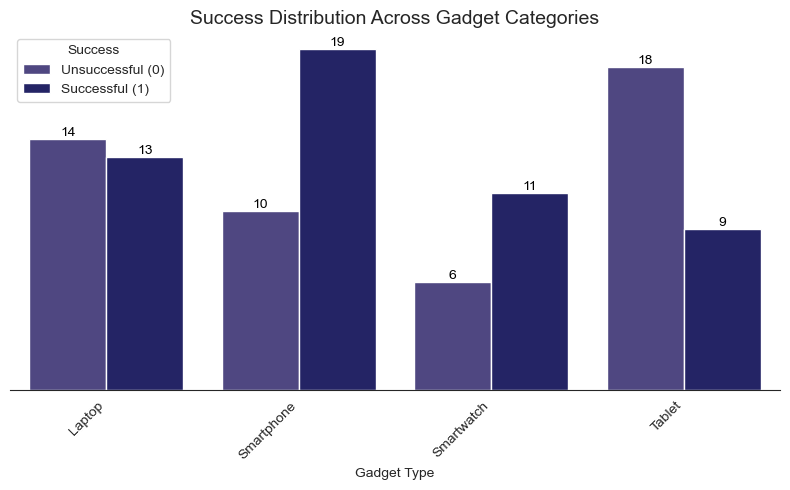

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_style("white")

# Create countplot with hue to separate successful (1) and unsuccessful (0)
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=tech, x='GADGET_TYPE', hue='SUCCESS', palette=["#483D8B", "#191970"])

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, color='black')

# Styling
ax.set_title("Success Distribution Across Gadget Categories", fontsize=14)
ax.set_xlabel("Gadget Type")
ax.set_ylabel("")  # remove y-axis label
ax.set_yticks([])
ax.tick_params(left=False)
sns.despine(left=True)

plt.xticks(rotation=45, ha='right')
plt.legend(title='Success', labels=['Unsuccessful (0)', 'Successful (1)'])
plt.tight_layout()
plt.show()


## Analysis

The chart compares the number of successful and unsuccessful outcomes across different gadget categories: Laptop, Smartphone, Smartwatch, and Tablet.

Laptop: 14 Unsuccessful, 13 Successful

Smartphone: 10 Unsuccessful, 19 Successful

Smartwatch: 6 Unsuccessful, 11 Successful

Tablet: 18 Unsuccessful, 9 Successful


## Key Insights

Smartphones have the highest number of successful outcomes.

Tablets have the highest number of unsuccessful outcomes.

For Laptops, Smartphones, and Smartwatches, the number of successful outcomes is close to or higher than the number of unsuccessful outcomes.

For Tablets, the number of unsuccessful outcomes is significantly higher than the number of successful outcomes.

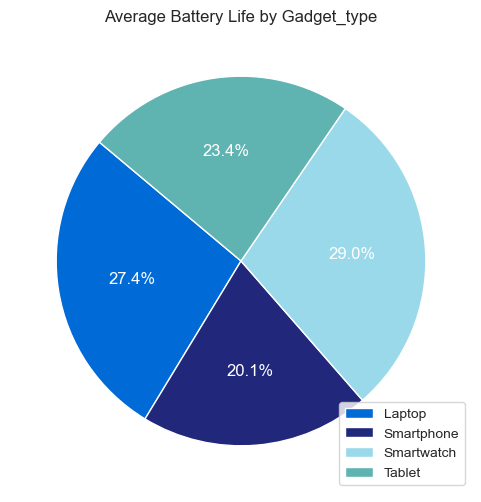

In [27]:
## plotting average pattery life by category using piechart

# calculating average battery life of each category
avg_battery_life = tech.groupby("GADGET_TYPE", observed=True)["BATTERY_LIFE"].mean()

# Define your color list
colors = ["#006aD7","#21277B","#9aD9EA","#5FB3B1"] #add more colors as needed.

# Create the pie chart WITHOUT outer labels
plt.figure(figsize=(6, 6))
plt.pie(avg_battery_life,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors,
       textprops={"color": "white", "fontsize": 12}) #add the colors to the pie chart

# Add a title
plt.title('Average Battery Life by Gadget_type')

# adding a legend:
plt.legend(avg_battery_life.index, loc='best') # 'best' tries to find the least obtrusive location


## to save the chart
plt.savefig("pie3.jpeg")

# Display the pie chart
plt.show()

## Findings and Insights
•	Smartwatches contribute the largest share of average battery life — possibly optimized for longevity due to daily use.

•	Tablets have strong average battery life, likely due to efficient hardware and less intensive tasks.

•	Laptops make up a moderate share — their power-hungry components may reduce average battery duration.

•	Smartphones have the smallest slice, reflecting generally shorter battery spans or smaller batteries due to frequent usage.


In [28]:
## calling out the average battery life
avg_battery_life.to_frame()

BATTERY_LIFE
GADGET_TYPE              
Laptop          32.111111
Smartphone      23.551724
Smartwatch      34.000000
Tablet          27.444444

In [29]:
## calling out the unique and value counts of Brand
tech["COMPANY"].unique()
tech["COMPANY"].value_counts().to_frame()

count
COMPANY         
Company B     29
Company A     28
Company C     22
Company D     21

In [30]:
## calling out the value counts of Storage_capacity
tech["STORAGE_CAPACITY"].value_counts().to_frame()

count
STORAGE_CAPACITY       
8                    17
256                  16
32                   15
128                  14
16                   13
512                  13
64                   12

In [31]:
## calling out the value counts of RAM
tech["RAM"].value_counts().to_frame()

count
RAM       
32      18
8       17
16      17
2       15
6       15
1       10
4        8

In [32]:
## calling out the value counts of Operating_System
dis_os = tech["OPERATING_SYSTEM"].value_counts().to_frame()
dis_os

count
OPERATING_SYSTEM       
Android              37
Windows              34
iOS                  29

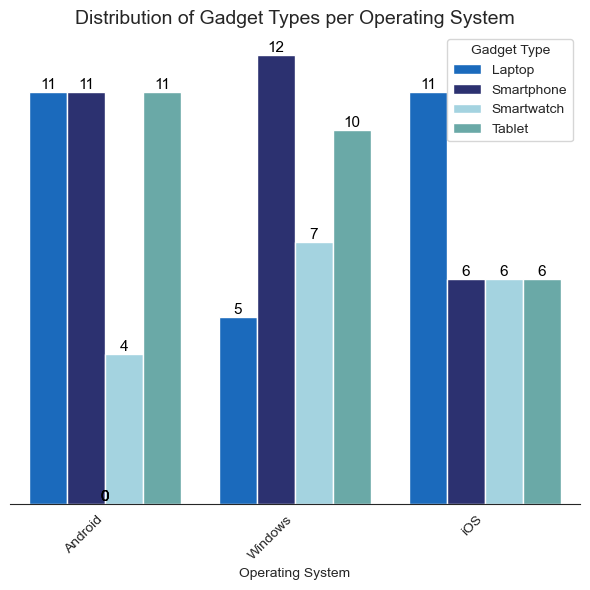

In [66]:
# Gadget distribution by Operating Systems
# Group the data by Operating System and Category
os_category_counts = tech.groupby(['OPERATING_SYSTEM', 'GADGET_TYPE']).size().reset_index(name='Count')

# Set white background with no grid
sns.set_style("white")

# Define color palette
colors = ["#006aD7","#21277B","#9aD9EA","#5FB3B1"]

# Create the plot
plt.figure(figsize=(6, 6))
ax = sns.barplot(data=os_category_counts, x='OPERATING_SYSTEM', y='Count', hue='GADGET_TYPE', palette=colors)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, color='black')

# Remove y-axis values and gridlines
ax.set_yticks([])
ax.set_ylabel("")
ax.tick_params(left=False)
sns.despine(left=True)

# Customize other elements
ax.set_title("Distribution of Gadget Types per Operating System", fontsize=14)
ax.set_xlabel("Operating System")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gadget Type')

# Final layout tweaks and save
plt.tight_layout()
plt.savefig("os_vs_gadget_grouped_bar.png")

# Show plot
plt.show()


## Analysis

The chart shows how different gadget types (Laptop, Smartphone, Smartwatch, and Tablet) are distributed across three operating systems: Android, Windows, and iOS.

Android: Primarily associated with Smartphones (11) and Tablets (11), with fewer Laptops (11) and very few Smartwatches (4).

Windows: Shows a concentration in Laptops (12), with some presence in Smartphones (5) and Smartwatches (7), but no Tablets.

iOS: Exclusively features Smartphones (6) and Tablets (6).


## Key Insights

Android has a strong presence in Smartphones and Tablets.

Windows is dominant in Laptops.

iOS is used for both Smartphones and Tablets.

Smartwatches have representation across all OS, but with lower numbers compared to Smartphones.

In [69]:
# extracting the year from the launch_date
tech["LAUNCH_DATE"] = pd.to_datetime(tech["LAUNCH_DATE"])
tech["YEAR"] = tech["LAUNCH_DATE"].dt.year

In [71]:
tech["YEAR"].unique()

array([2022, 2019, 2020, 2021])

In [73]:
tech["YEAR"].dtypes

dtype('int32')

In [75]:
## changing datatype of year from integer to category
tech["YEAR"] = tech["YEAR"].astype("category")

In [77]:
## count of success
tech["SUCCESS"].value_counts().to_frame()

count
SUCCESS       
1           52
0           48

In [79]:
# number of successful and unsuccessful by brands
brands_by_success_rates = tech.groupby("COMPANY", observed=True)["SUCCESS"].value_counts().to_frame()
brands_by_success_rates

count
COMPANY   SUCCESS       
Company A 1           15
          0           13
Company B 1           16
          0           13
Company C 0           11
          1           11
Company D 0           11
          1           10

In [81]:
# number of successful and unsuccessful by brands
brands_by_success_rates = tech.groupby("COMPANY", observed=True)["PRICE"].sum().to_frame()
brands_by_success_rates

PRICE
COMPANY         
Company A  29440
Company B  32090
Company C  25289
Company D  20439

In [83]:
## calling the dataset
tech

GADGET_ID LAUNCH_DATE    COMPANY GADGET_TYPE  PRICE  BATTERY_LIFE  \
0          1  2022-08-02  Company A      Laptop   1226            38   
1          2  2019-08-17  Company B      Tablet   1559            14   
2          3  2019-02-21  Company A      Laptop    960            40   
3          4  2020-07-17  Company C      Tablet   1394            18   
4          5  2020-05-16  Company D      Tablet   1230            35   
..       ...         ...        ...         ...    ...           ...   
95        96  2022-11-10  Company A  Smartphone   1600            10   
96        97  2022-02-14  Company B      Laptop    802            32   
97        98  2020-03-25  Company C  Smartwatch    501            32   
98        99  2022-11-03  Company D  Smartwatch    829            48   
99       100  2020-10-26  Company B      Laptop   1679            48   

    SCREEN_SIZE STORAGE_CAPACITY RAM  CAMERA_QUALITY OPERATING_SYSTEM  WEIGHT  \
0           7.7              512  16              93              iOS    2376   
1          15.1               32  16              61          Windows    2314   
2           6.2                8   6              68          Windows    2964   
3           3.0                8   4              75              iOS     922   
4           6.7               64  32              15          Windows    1871   
..          ...              ...  ..             ...              ...     ...   
95         16.9                8   8              95          Android     239   
96          3.8               64  16              36              iOS     554   
97          1.3              128   6              11          Android    1264   
98          8.9               64   8              54              iOS    1581   
99          3.9                8  32              12          Android     873   

    USER_RATINGS  SALES_VOLUME SUCCESS  YEAR  
0            3.1         62886       0  2022  
1            2.7         76745       1  2019  
2            4.2         84251       1  2019  
3            4.9         95456       0  2020  
4            3.2         54413       0  2020  
..           ...           ...     ...   ...  
95           3.5         35674       1  2022  
96           4.9         36854       0  2022  
97           3.4         47271       0  2020  
98           3.5         74688       1  2022  
99           3.2         39518       0  2020  

[100 rows x 16 columns]

In [85]:
total_sale_volumes = tech.groupby("YEAR", observed=True)["SALES_VOLUME"].sum()

In [87]:
total_sale_volumes.to_frame()

SALES_VOLUME
YEAR              
2019       1199808
2020       1450167
2021        835260
2022       1368162

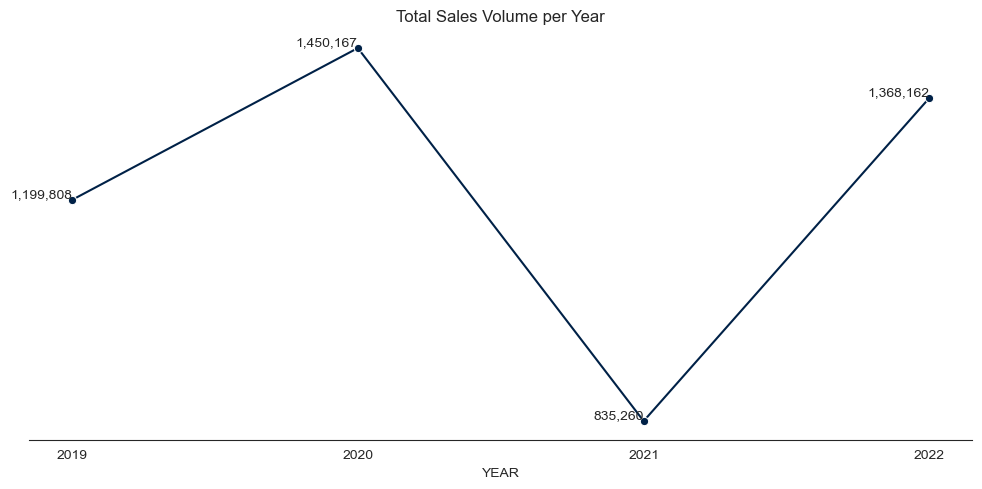

In [92]:
# Sales Volume trend by year
# Assuming 'tech' DataFrame is already defined
total_sale_volumes = tech.groupby("YEAR", observed=True)["SALES_VOLUME"].sum()

# Create a new DataFrame for plotting
grouped_sales_df = total_sale_volumes.reset_index()
grouped_sales_df['YEAR'] = grouped_sales_df['YEAR'].astype(str) # Ensure YEAR is treated as category

# Create the line plot of total sales volume per year
plt.figure(figsize=(10, 5))
sns.lineplot(x='YEAR', y='SALES_VOLUME', data=grouped_sales_df, marker='o', color="#002147")

# Add data labels for total sales volume
for index, row in grouped_sales_df.iterrows():
    plt.text(row['YEAR'], row['SALES_VOLUME'], f"{row['SALES_VOLUME']:,}",
             ha='right', va='bottom')

# Add labels and title
plt.xlabel('YEAR')
plt.ylabel('Total Sales Volume')
plt.title('Total Sales Volume per Year')

# Remove y-axis values
plt.gca().axes.get_yaxis().set_visible(False)

# Remove the top and right spines
sns.despine(left=True, top=True, right=True)

plt.tight_layout()
plt.show()

## Findings
From 2019 to 2020, Total sales volume grew from 1.2M to 1.45M units (+21%), showing a strong upward trend likely due to increased demand or expansion.

From 2020 to 2021, there was a sharp decline to 833K units (-43%), experiencing a major drop suggesting external disruptions or internal challenges.

From 2021 to 2022: Sales recovered significantly to 1.37M units (+64%), showing a strong bounce-back, possibly from strategic improvements or market recovery.

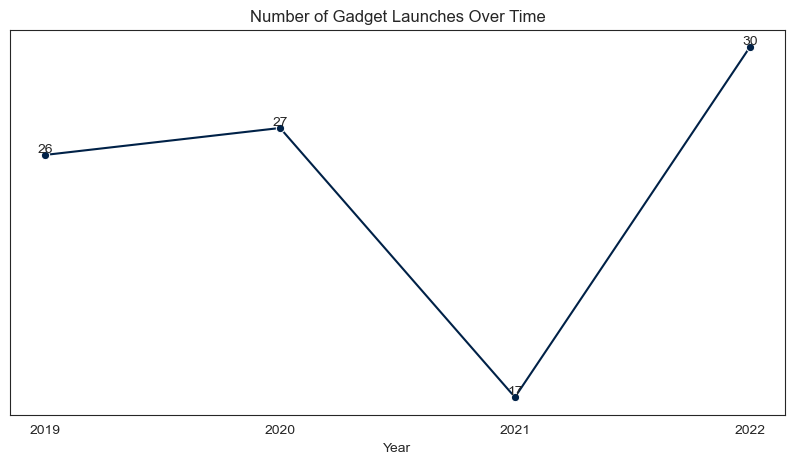

In [45]:
# --- RQ1: How has the number of gadget launches changed over time? 

# Convert 'YEAR' to integer first to remove decimals, then group
tech['YEAR'] = tech['YEAR'].astype(int)
gadget_launches_over_time = tech.groupby('YEAR', observed=False)['GADGET_ID'].count()

# Create a new DataFrame for plotting (optional but good practice for explicit control)
grouped_gadget_df = gadget_launches_over_time.reset_index()
grouped_gadget_df['YEAR'] = grouped_gadget_df['YEAR'].astype(str) # Ensure YEAR is treated as category

plt.figure(figsize=(10, 5))
sns.lineplot(x='YEAR', y='GADGET_ID', data=grouped_gadget_df, marker='o',color="#002147")

# Add data labels for count of gadget ID
for index, row in grouped_gadget_df.iterrows():
    plt.text(row['YEAR'], row['GADGET_ID'], f"{row['GADGET_ID']:,}",
             ha='center', va='bottom', fontsize=10)
    
plt.xlabel('Year')
plt.ylabel('Count of Gadget ID')
plt.title('Number of Gadget Launches Over Time')
plt.grid(False)

# Remove y-axis values
plt.gca().axes.get_yaxis().set_visible(False)

## to save the chart
plt.savefig("RQ1.jpeg")
plt.show()

## Findings
### Gadget Launches (2019–2022)
2019 to 2020 recorded a slight increase from 26 to 27 launches, indicating a stable, consistent product rollout strategy.

From 2020 to 2021, there was a significant drop to 13 launches (approximately 52% decline), which may suggest major disruption likely due to external factors like the pandemic or internal delays.

Between 2021 to 2022, there was a strong recovery to 30 launches (approximatly 131% increase), indicating a possible catch-up period or aggressive push to re-enter the market.

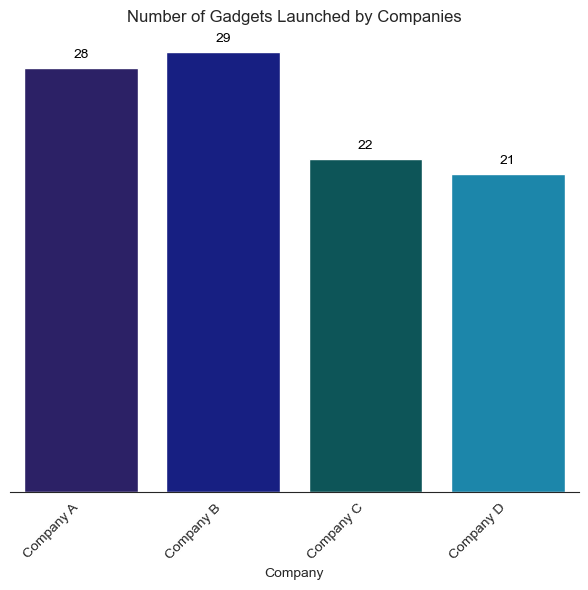

In [46]:
# --- RQ2: company launched the most gadgets? ---
plt.figure(figsize=(6, 6))

# Count gadgets per company and sort
brand_launch_counts = tech['COMPANY'].value_counts().sort_values(ascending=False)

# Convert to DataFrame for Seaborn compatibility
brand_df = brand_launch_counts.reset_index()
brand_df.columns = ['Company', 'Count']

# Define custom color palette (extend if more companies)
my_colors = ["#241571","#051094", "#016064", "#0492C2"] * (len(brand_df) // 4 + 1)

# Create sorted barplot
ax = sns.barplot(x='Company', y='Count', data=brand_df, palette=my_colors[:len(brand_df)])

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

# Styling
plt.xlabel('Company')
plt.ylabel('')
plt.title('Number of Gadgets Launched by Companies')
plt.xticks(rotation=45, ha='right')
plt.gca().axes.get_yaxis().set_visible(False)
sns.despine(left=True)
plt.tight_layout()

# Show plot
plt.show()


## FINDINGS AND INSIGHTS


The chart shows the number of gadgets launched by four companies. 

Company B has launched the most gadgets (29), closely followed by Company A (28). 

Companies C (22) and D (21) have launched a slightly lower number of gadgets compared to A and B. 

This indicates that Companies A and B have a higher output or broader product portfolio in the gadget market within this dataset.

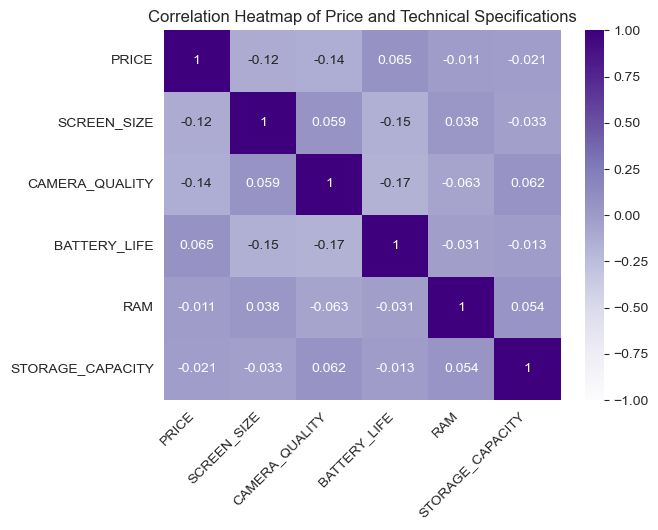

In [47]:
# RQ3 How does Price correlate with technical specifications like RAM, Storage Capacity, Screen Size, Camera Quality, and Battery Life? 
## Define the subset of specs
specs_df = tech[["PRICE", "SCREEN_SIZE", "CAMERA_QUALITY", "BATTERY_LIFE", "RAM", "STORAGE_CAPACITY"]]  # adjust if needed

# Compute correlation matrix
correlation_matrix = specs_df.corr()

# Define your custom colormap
my_colors = ["#006aD7","#21277B","#9aD9EA","#5FB3B1"]

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="Purples", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Price and Technical Specifications")
plt.xticks(rotation=45, ha='right')

## to save the chart
plt.savefig("RQ3_correlation.jpeg")
plt.show()

## Findings and Insights:
Feature	Correlation with PRICE	Interpretation
Screen Size	-0.12	Weak negative correlation. Slight tendency for larger screens to have lower prices.

Camera Quality	-0.14	Weak negative correlation. Better cameras may be found in cheaper phones here.

Battery Life	0.06	Very weak positive correlation. Slight trend that phones with better battery life cost a bit more.


### Overall Insights:
•	Surprisingly, none of the technical specs show a strong or even moderate correlation with price.
•	This suggests that other factors (e.g., brand, build quality, marketing, software features, etc.) may have more impact on pricing than these raw specs.
•	Also possible: data might be too small or not varied enough to show strong relationships


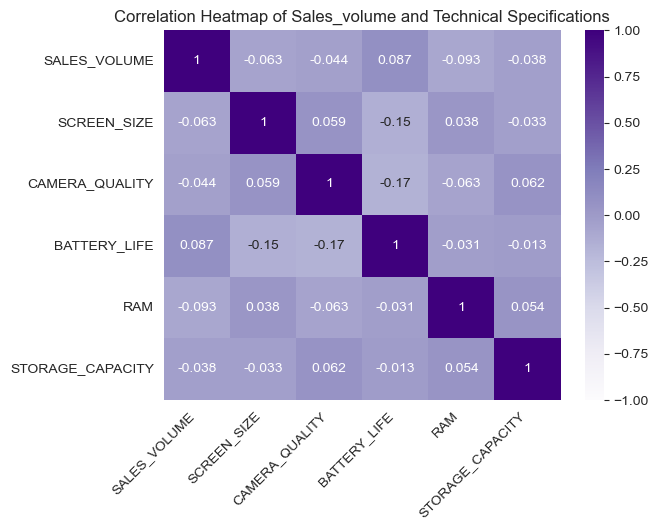

In [96]:
# RQ3 How does Sales Volume correlate with technical specifications like RAM, Storage Capacity, Screen Size, Camera Quality, and Battery Life? 
## Define the subset of specs
specs_df = tech[["SALES_VOLUME", "SCREEN_SIZE", "CAMERA_QUALITY", "BATTERY_LIFE", "RAM", "STORAGE_CAPACITY"]]  # adjust if needed

# Compute correlation matrix
correlation_matrix = specs_df.corr()

# Define your custom colormap
my_colors = ["#006aD7","#21277B","#9aD9EA","#5FB3B1"]

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="Purples", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Sales_volume and Technical Specifications")
plt.xticks(rotation=45, ha='right')

## to save the chart
plt.savefig("RQ_10correlation.jpeg")
plt.show()

## FIndings and Insights

Sales_volume has very weak correlations with all the technical specifications shown. The strongest correlation is with "Battery_life" (0.087), but this is still very weak.

The technical specifications themselves show some moderate correlations:

"Screen_size" and "Battery_life" have a moderate negative correlation (-0.15).

"Camera_quality" and "Battery_life" have a moderate negative correlation (-0.17).

All other correlations between the technical specifications are weak.

In summary: Sales volume is not strongly influenced by any of the technical specifications included in this analysis.

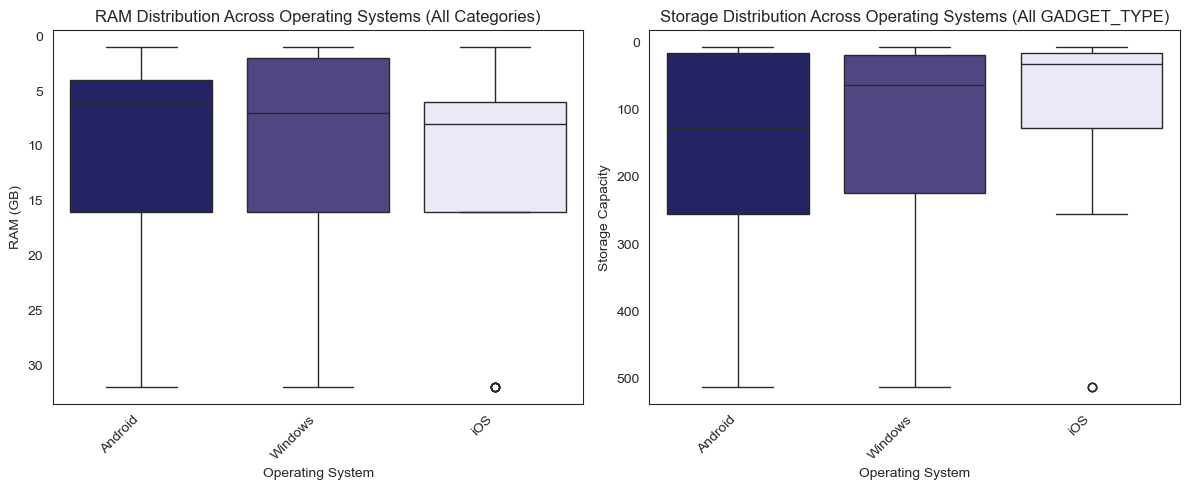

In [98]:
# How do specs like RAM and Storage Capacity typically vary across all Operating Systems?
# Filter dataset (remove missing values only, no category filtering)
all_gadgets = tech.dropna(subset=['OPERATING_SYSTEM', 'RAM', 'STORAGE_CAPACITY'])

# Set figure size for both plots side by side
plt.figure(figsize=(12, 5))  # Increased width for better spacing

# Define your custom colors
my_colors = ["#191970", "#483D8B", "#E6E6FA"]  # Adjust if there are more OS types

# --- First Plot: Operating System vs. RAM ---
plt.subplot(1, 2, 1)  # 1 row, 2 columns, plot 1
sns.boxplot(
    x='OPERATING_SYSTEM', 
    y='RAM', 
    data=all_gadgets, 
    palette=my_colors, 
    hue='OPERATING_SYSTEM', 
    dodge=False,
    legend=False
)
plt.xlabel('Operating System')
plt.ylabel('RAM (GB)')
plt.title('RAM Distribution Across Operating Systems (All Categories)')
plt.xticks(rotation=45, ha='right')

# --- Second Plot: Operating System vs. Storage Capacity ---
plt.subplot(1, 2, 2)  # 1 row, 2 columns, plot 2
sns.boxplot(
    x='OPERATING_SYSTEM', 
    y='STORAGE_CAPACITY', 
    data=all_gadgets, 
    palette=my_colors, 
    hue='OPERATING_SYSTEM', 
    dodge=False,
    legend=False
)
plt.xlabel('Operating System')
plt.ylabel('Storage Capacity')
plt.title('Storage Distribution Across Operating Systems (All GADGET_TYPE)')
plt.xticks(rotation=45, ha='right')

# Adjust spacing
plt.tight_layout()

# Save the combined chart
plt.savefig("OS_vs_RAM_Storage_AllCategories.jpeg")

# Show plot
plt.show()


## Analysis
The box plot displays two box plots comparing RAM and Storage Capacity across Android, Windows, and iOS operating systems.

**RAM Distribution:**

Android and Windows show similar RAM distribution with medians around 5-6 GB.

iOS devices generally have lower RAM, with a median around 4GB.

Both Android and Windows devices have higher variability in RAM, with some devices having up to 30GB.

**Storage Distribution:**

Android and Windows devices have a broader range of storage capacities, with medians around 100GB.

iOS devices show a wider range, with the median around 64 GB, but some devices have up to 512GB.


## Key Insights

Android and Windows devices tend to have more RAM and storage, likely due to a wider variety of hardware options.

iOS devices have less RAM but comparable storage options.

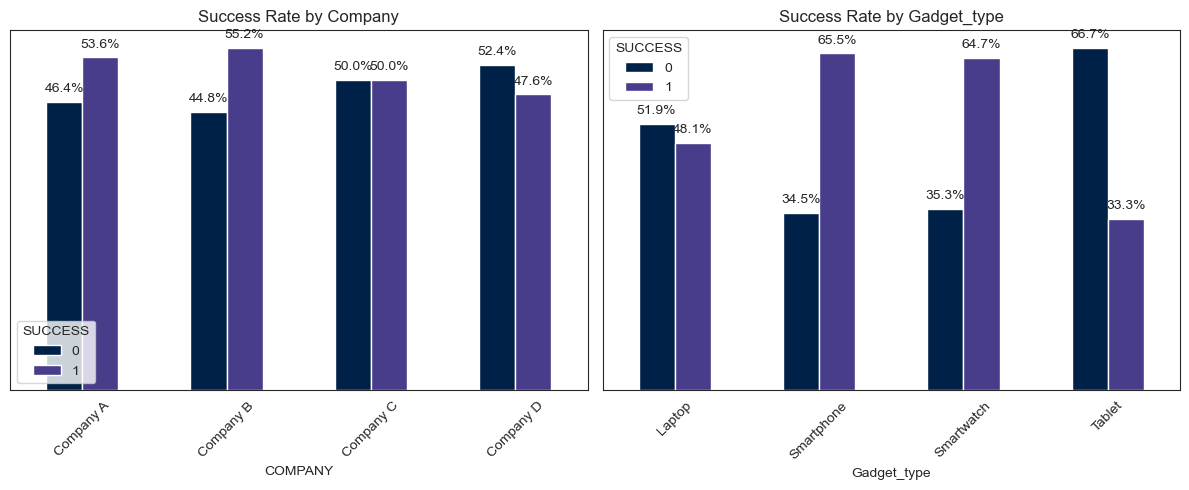

In [102]:
## RQ 6: Are certain Companies or Gadget_types more associated with successful gadgets?
# Define your custom colors
brand_colors = ["#002147", "#483D8B"]  # Colors for Brand bars
category_colors = ["#002147", "#483D8B"]  # Colors for Category bars,

# Create subplots on the same line
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns, adjust figsize as needed

# For Brand
brand_success = pd.crosstab(tech['COMPANY'], tech['SUCCESS'], normalize='index') * 100
brand_plot = brand_success.plot(kind='bar', stacked=False, ax=axes[0], color=brand_colors) #Added color=brand_colors
axes[0].set_title('Success Rate by Company')
axes[0].set_xlabel('COMPANY')
axes[0].set_ylabel('Percentage')

# Add data labels to brand plot
for p in brand_plot.patches:
    axes[0].annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')
axes[0].tick_params(axis='x', rotation=45, labelrotation=45) #corrected location

# Remove y-axis values
axes[0].get_yaxis().set_visible(False) #Corrected to use axes[0].get_yaxis()

# For Category
category_success = pd.crosstab(tech['GADGET_TYPE'], tech['SUCCESS'], normalize='index') * 100
category_plot = category_success.plot(kind='bar', stacked=False, ax=axes[1], color=category_colors) #added color=category_colors
axes[1].set_title('Success Rate by Gadget_type')
axes[1].set_xlabel('Gadget_type')
axes[1].set_ylabel('Percentage')

# Add data labels to category plot
for p in category_plot.patches:
    axes[1].annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')
axes[1].tick_params(axis='x', rotation=45, labelrotation=45) #corrected location

# Remove y-axis values
axes[1].get_yaxis().set_visible(False) #Corrected to use axes[1].get_yaxis()

plt.tight_layout()  # prevents charts from overlapping.

plt.show()

## Findings and Insights 

### success rate by Company

Company B has the highest success rate, suggesting it may be the most reliable or positively received. company A follows closely behind and Brand D has a marginally lower success rate while Brand C is evenly split — neither favored nor disfavored by success.

### success rate by Gadget type

Smartphones and Smartwatches are strongly associated with success, both above 64%. Laptops have a near-even success distribution (slightly more failures) but Tablets are the least successful category, with only a 33.3% success rate.

### Overall Interpretation

Although both Comypan and gadget type are associated with gadget success, On the company side, company B leads in success rate, potentially indicating better design, marketing, or customer satisfaction and On the gadget type side, Smartphones and Smartwatches stand out as the most successful, while Tablets underperform significantly.



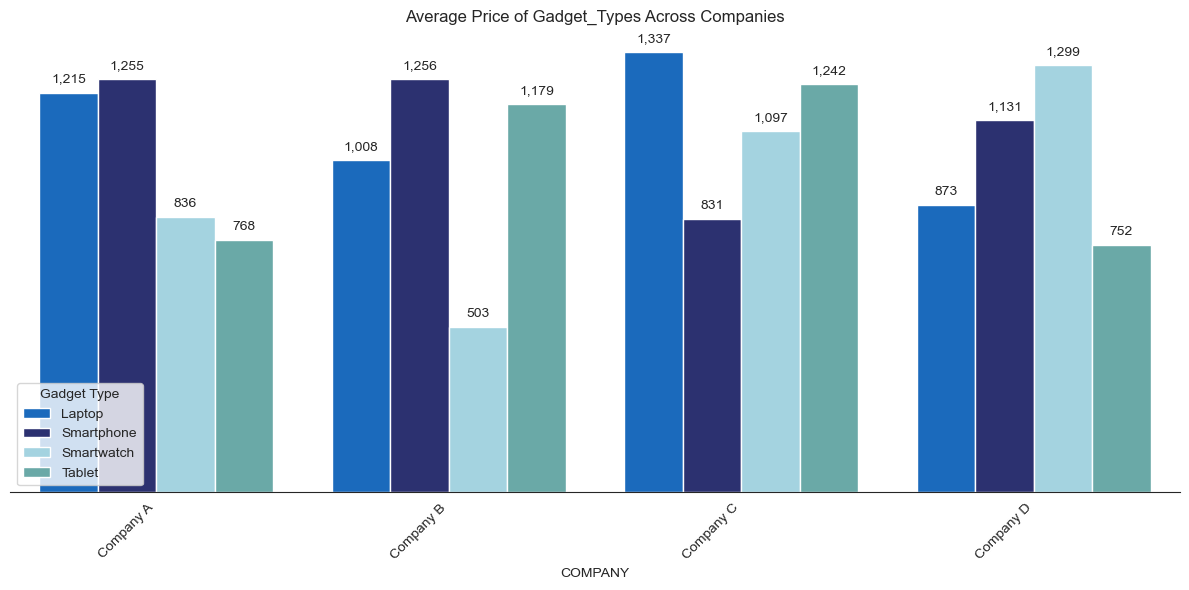

In [57]:
# --- RQ8: Do specific gadget_types dominate sales within particular companies? ---
plt.figure(figsize=(12, 6))

# Define your custom colors
my_colors = ["#006aD7","#21277B","#9aD9EA","#5FB3B1"] * 4  # Extend if needed

# Limit to top 4 brands (optional, for cleaner visualization)
top_4_brands = tech['COMPANY'].value_counts().nlargest(4).index
filtered_tech = tech[tech['COMPANY'].isin(top_4_brands)]

# Create barplot: X = Company, Hue = Gadget type, Y = Average price
ax = sns.barplot(
    x='COMPANY',
    y='PRICE',
    hue='GADGET_TYPE',
    data=filtered_tech,
    estimator=np.mean,  
    palette=my_colors[:4],
    errorbar=None
)

# Title and styling
plt.title('Average Price of Gadget_Types Across Companies')
plt.xticks(rotation=45, ha='right')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height):,}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 5), textcoords='offset points')

# Clean up Y-axis
ax.set_ylabel('')
ax.set_yticks([])
sns.despine(left=True)
# Position the legend
ax.legend(title='Gadget Type', loc='lower left')  # Common options: 'upper left', 'lower left', etc.

plt.tight_layout()

plt.show()


## Analysis

The chart compares the average prices of four gadget types (Laptop, Smartphone, Smartwatch, and Tablet) across four companies (A, B, C, and D).

Laptops: Prices range from around 1215 (Company A) to 1337 (Company C).

Smartphones: Prices vary significantly, from 831 (Company C) to 1256 (Company B).

Smartwatches: Prices are generally lower, ranging from 503 (Company B) to 1097 (Company C).

Tablets: Prices also show variation, from 752 (Company D) to 1299 (Company D).


## Key Insights

Laptops consistently have higher average prices across all companies.

Company C generally has higher prices for Smartphones and Smartwatches.

Company D has the highest price for Tablets.

There's considerable price variation for Smartphones and Tablets across companies, indicating different market strategies or product positioning.

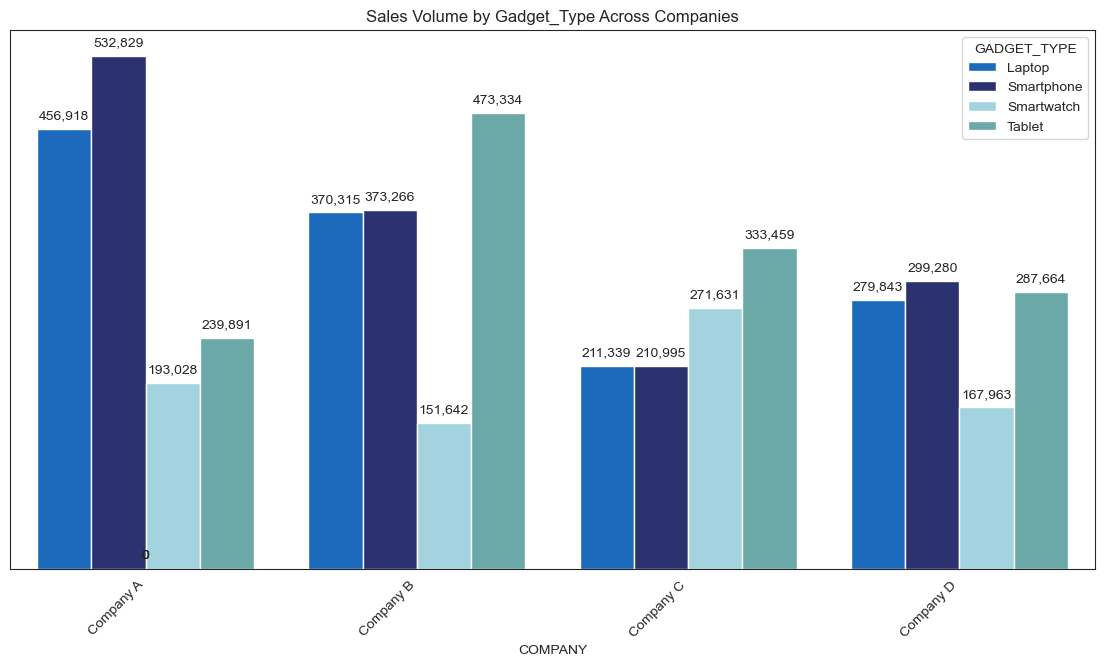

In [106]:
# RQ8: Do specific brands dominate sales within particular categories?
plt.figure(figsize=(14, 7))

# Define your custom colors
my_colors = ["#006aD7","#21277B","#9aD9EA","#5FB3B1"] # Add more colors as needed

unique_brands = tech['COMPANY'].nunique() #Get number of unique brands.

ax = sns.barplot(x='COMPANY', y='SALES_VOLUME', hue='GADGET_TYPE', data=tech, estimator=sum, palette=my_colors[:unique_brands], errorbar=None) #Slice the list and remove error bars

plt.title('Sales Volume by Gadget_Type Across Companies')
plt.xticks(rotation=45, ha='right')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',  # Add comma separator
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5), textcoords='offset points')

# Remove y-axis labels and ticks
ax.set_ylabel('')  # Remove the y-axis label
ax.set_yticks([]) #Remove the y-axis ticks/values

plt.show()

## Insights from the barchart

The chart illustrates the sales volume for each gadget type (Laptop, Smartphone, Smartwatch, Tablet) broken down by company.

Company A shows the highest sales volume for Smartphones, significantly outperforming other gadget types and companies in this category. Their Laptop sales are also substantial.

Company B has strong sales in both Laptops and Smartphones, with Smartphone sales slightly higher. Their Tablet sales volume is the highest among all companies.

Company C's top-selling gadget type is Tablets, with a significantly higher volume compared to their Laptops, Smartphones, and Smartwatches.

Company D demonstrates relatively balanced sales across Laptops, Smartphones, and Tablets, with Tablet sales being the highest for them. Their Smartwatch sales are the lowest across all their gadget types.

Overall, the chart highlights the varying strengths of each company in different gadget categories. Company A excels in smartphone sales, Company B in both laptops and smartphones (and leads in tablet volume), Company C dominates in tablet sales, and Company D shows more distributed sales across its main product lines.

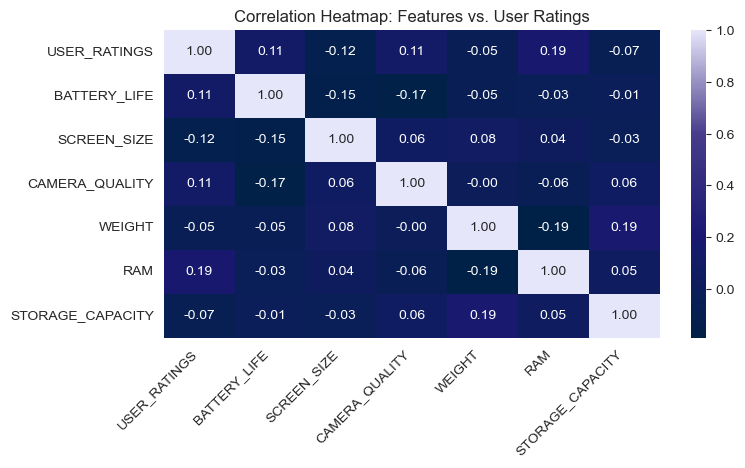

In [109]:
# RQ9: Which features (Battery Life, Screen Size, Camera Quality, Weight) correlate most strongly with User Ratings?

from matplotlib.colors import LinearSegmentedColormap  #import for the color mapping

features_to_correlate = ['BATTERY_LIFE', 'SCREEN_SIZE', 'CAMERA_QUALITY', 'WEIGHT', 'RAM', 'STORAGE_CAPACITY']

# Create a correlation matrix
correlation_matrix = tech[['USER_RATINGS'] + features_to_correlate].corr()

# Define your custom colormap
my_colors = ["#002147", "#191970", "#483D8B", "#E6E6FA"]
cmap = LinearSegmentedColormap.from_list("mycmap", my_colors)

# Create a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Heatmap: Features vs. User Ratings')
plt.xticks(rotation=45, ha='right')

plt.show()


## Insights from the Heatmap

### Key Takeaways
This heatmap displays correlations between user ratings and gadget features.

### Slight Positive Correlations with User Ratings:
User ratings show slight positive correlations with Battery Life (0.11) and Camera Quality (0.11), suggesting these features might somewhat positively influence user satisfaction. RAM also shows a slightly stronger positive correlation (0.19) with user ratings.

### Slight Negative Correlation with Screen Size:
Screen Size has a slight negative correlation (-0.12) with user ratings in this data.
Weak Correlations: Weight and Storage Capacity show very weak correlations with user ratings.

### Moderate Negative Correlation between Weight and RAM: 
There's a moderate negative correlation (-0.19) between Weight and RAM, implying that heavier gadgets in this dataset might tend to have less RAM.

### Moderate Positive Correlation between Weight and Storage Capacity:
Weight shows a moderate positive correlation (0.19) with Storage Capacity, suggesting heavier gadgets might tend to have more storage.

Overall, while some features show slight correlations with user ratings, RAM appears to have the most noticeable positive linear relationship in this dataset. There are also some interesting correlations between the features themselves

# MACHINE LEARNING

In [114]:
# Preview data types
print("\nData Types:\n", tech.dtypes)


Data Types:
 GADGET_ID                   object
LAUNCH_DATE         datetime64[ns]
COMPANY                   category
GADGET_TYPE               category
PRICE                        int64
BATTERY_LIFE                 int64
SCREEN_SIZE                float64
STORAGE_CAPACITY          category
RAM                       category
CAMERA_QUALITY               int64
OPERATING_SYSTEM          category
WEIGHT                       int64
USER_RATINGS               float64
SALES_VOLUME                 int64
SUCCESS                   category
YEAR                      category
dtype: object


In [116]:
# Encode categorical variables
cat_cols = ['STORAGE_CAPACITY', 'COMPANY', 'GADGET_TYPE', 'RAM', 'OPERATING_SYSTEM','SCREEN_SIZE','USER_RATINGS']
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    tech[col] = le.fit_transform(tech[col])
    label_encoders[col] = le

In [118]:
# Feature Selection
X = tech.drop(['SUCCESS', 'GADGET_ID','LAUNCH_DATE','YEAR'], axis=1)  # exclude target and date
y = tech['SUCCESS']


In [120]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [122]:
print(X.dtypes)


COMPANY             int32
GADGET_TYPE         int32
PRICE               int64
BATTERY_LIFE        int64
SCREEN_SIZE         int64
STORAGE_CAPACITY    int64
RAM                 int64
CAMERA_QUALITY      int64
OPERATING_SYSTEM    int32
WEIGHT              int64
USER_RATINGS        int64
SALES_VOLUME        int64
dtype: object


# Logistic Regression

In [125]:
# 8.1st Model Training(Logistic Regression)
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [127]:
## predicting the model
y_pred = model.predict(X_test)


In [129]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Detailed Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.3
Confusion Matrix:
 [[1 9]
 [5 5]]
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.10      0.12        10
           1       0.36      0.50      0.42        10

    accuracy                           0.30        20
   macro avg       0.26      0.30      0.27        20
weighted avg       0.26      0.30      0.27        20



In [131]:
# Viewing Predicted vs Actual
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison.tail())


   Actual  Predicted
38      1          1
17      1          0
58      0          1
2       1          1
14      1          0


## Hyperparameter Tuning (Logistic Regression)

In [134]:
## Retraining using Logical Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.01, 0.1, 1, 10, 100],         # Regularization strength (smaller = stronger)
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [1000]
}


In [136]:
##  Creating the GridSearchCV object
model = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)


In [138]:
## Fitting the Grid Search to Training Data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='f1')

In [139]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model
best_model = grid_search.best_estimator_


Best Parameters: {'C': 0.01, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.5229776759188525


In [140]:
y_pred = best_model.predict(X_test)
print("Test Set Report:\n", classification_report(y_test, y_pred))


Test Set Report:
               precision    recall  f1-score   support

           0       0.50      0.30      0.38        10
           1       0.50      0.70      0.58        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.48        20
weighted avg       0.50      0.50      0.48        20



In [141]:
# Viewing Predicted vs Actual
# Predict with the best model found by GridSearch
y_pred = best_model.predict(X_test)

# Create a DataFrame to compare actual vs predicted


comparison_df = pd.DataFrame({
    'f1': y_test.values,
    'Predicted': y_pred
})

print(comparison_df.head(10))  # View the first 10 for quick inspection


  f1  Predicted
0  1          0
1  1          1
2  1          1
3  1          1
4  0          1
5  0          1
6  0          1
7  1          1
8  0          0
9  0          1


##  Logistic Regression Model Documentation

The Logistic Regression model has low accuracy (30%) this suggests that the model struggles to correctly classify the outcomes.

Misclassification is notably high for class 0.
After hyperparameter tuning we still had lower accuracy.

#### Model performance may improve with:

Better feature selection or engineering

Normalizing/scaling data

Since the Logistic Regression wasn't giving us higher accuracy we tried different models (e.g., Random Forest, KNN)



## Random Forest

In [145]:
# 8. 2nd Model Training using Random Forest
model = RandomForestClassifier(random_state=62)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=62)

In [146]:
param_grid = {
    'n_estimators': [1, 3, 5, 7, 9, 11],         # fewer trees, enough for small data
    'max_depth': [None, 5, 10],               # limit depth to prevent overfitting
    'min_samples_split': [2, 5],              # simpler split rules
    'min_samples_leaf': [1, 2],               # allow small but stable leaves
    'bootstrap': [True]                       # keep it simple (False adds extra variance)
}

In [147]:
rf = RandomForestClassifier(random_state=62)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=62), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [1, 3, 5, 7, 9, 11]},
             scoring='accuracy', verbose=1)

In [148]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)


In [149]:
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
best_rf.score(X_train, y_train)
best_rf.score(X_test, y_test)

Best Parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 3}
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.56        10
           1       0.58      0.70      0.64        10

    accuracy                           0.60        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.60      0.60      0.60        20



0.6

In [150]:
## comparing the actual vrs predict
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison_df.head(10))

  Actual  Predicted
0      1          0
1      1          1
2      1          1
3      1          1
4      0          1
5      0          0
6      0          1
7      1          1
8      0          0
9      0          0


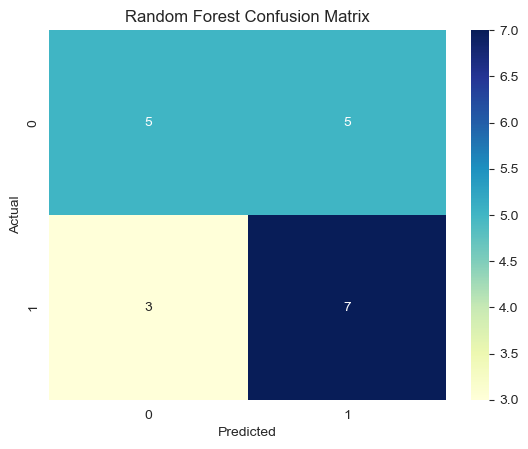

In [151]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


## Hyperparameter Tuning(Random Forest)

In [153]:
##  using Hyperparameter tuning to check for a better accuracy score
## Defining a Tuned Param Grid
param_grid = {
    'n_estimators': [1, 2, 3, 5],       # number of trees
    'max_depth': [None, 5, 10],             # tree depth
    'min_samples_split': [2, 5],            # min samples to split an internal node
    'min_samples_leaf': [1, 2],             # min samples at a leaf node
    'bootstrap': [True]                     # use sampling with replacement
}


In [154]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [1, 2, 3, 5]},
             scoring='accuracy', verbose=1)

In [155]:
### checking for the accuracy score using Random Forest
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
best_rf.score(X_train, y_train)
best_rf.score(X_test, y_test)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 2}
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.71      0.50      0.59        10

    accuracy                           0.65        20
   macro avg       0.66      0.65      0.64        20
weighted avg       0.66      0.65      0.64        20



0.65

In [156]:

## comparing the actual vrs predict
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison_df.head(10))


  Actual  Predicted
0      1          1
1      1          0
2      1          0
3      1          1
4      0          0
5      0          0
6      0          0
7      1          1
8      0          1
9      0          0


# Random Forest Documentation

After applying hyperparameter tuning to the Random Forest Classifier, the best parameters identified were: bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, and n_estimators=2. Despite tuning, the model maintained an accuracy of 65%, the same as before tuning. The classification report showed a slightly better performance on class 0 compared to class 1, with precision scores of 0.62 and 0.71, respectively. A comparison between actual and predicted values revealed some misclassifications, particularly for class 1. The results suggest that further improvements may require additional feature engineering or exploring alternative models.

# K-Nearest Neighbors (KNN) 

In [166]:
## 3rd Model Training using KNN. Creating a KNN Hyperparameter Grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],           # number of neighbors to consider
    'weights': ['uniform', 'distance'],   # equal weight or distance-based
    'metric': ['euclidean', 'manhattan']  # distance metric
}

## You can reduce the list of n_neighbors if performance is slow.


In [167]:
## Running GridSearchCV

knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [168]:
##  Evaluating using KNN model

best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# View accuracy
print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.60      0.52        10
           1       0.43      0.30      0.35        10

    accuracy                           0.45        20
   macro avg       0.45      0.45      0.44        20
weighted avg       0.45      0.45      0.44        20



In [169]:
## comparing actual vrs predict
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison_df.head(10))


  Actual  Predicted
0      1          0
1      1          1
2      1          0
3      1          0
4      0          0
5      0          0
6      0          0
7      1          0
8      0          0
9      0          1


## Hyperparameter Tuning(K-Nearest Neighbors (KNN)

In [171]:
## using Hyperparameter tuning to check for a better accuracy score
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],          # Number of neighbors to use
    'weights': ['uniform', 'distance'],         # Uniform = all equal, distance = weighted by distance
    'p': [1, 2],                                 # 1 = Manhattan, 2 = Euclidean
    'leaf_size': [20, 30, 40]                    # Affects speed (not accuracy)
}


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'leaf_size': 20, 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44        10
           1       0.50      0.60      0.55        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.49        20
weighted avg       0.50      0.50      0.49        20

  Actual  Predicted
0      1          1
1      1          1
2      1          0
3      1          1
4      0          1
5      0          1
6      0          0
7      1          1
8      0          0
9      0          0


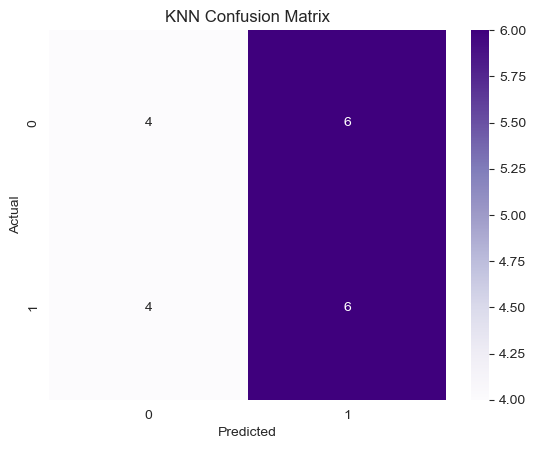

In [172]:
## using Hyperparameter tuning to check for a better accuracy score
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define KNN model and grid search
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': [20, 30, 40]
}

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

# Evaluate
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

print("Best Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Compare actual vs predicted
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison_df.head(10))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

# K-Nearest Neighbors (KNN) Model Documentation

#### Initial Model Performance

Accuracy: 45%

Class 1 recall: 30%

Best Params: n_neighbors=7, metric='euclidean', weights='uniform'

#### After Hyperparameter Tuning

Accuracy: 50%

Class 1 recall: 60%

Best Params: n_neighbors=11, leaf_size=20, p=1, weights='distance'

### Summary & Insight
After tuning, accuracy improved slightly from 45% to 50%.

The model became more balanced, particularly improving the recall and F1-score for class 1 (from 0.30 → 0.60 recall).

Although the tuned model still shows moderate performance, it offers a more equitable prediction across both classes, which is an improvement over the initial version.

### Conclusion: 
Hyperparameter tuning positively impacted the KNN model’s performance, especially for class 1, indicating it helped in better generalizing the model to unseen data. Further improvements may require more feature engineering or testing other algorithms.

### Comparing all 3 accuracy scores from Logical Regression Model, Random Forest and the KNN Model

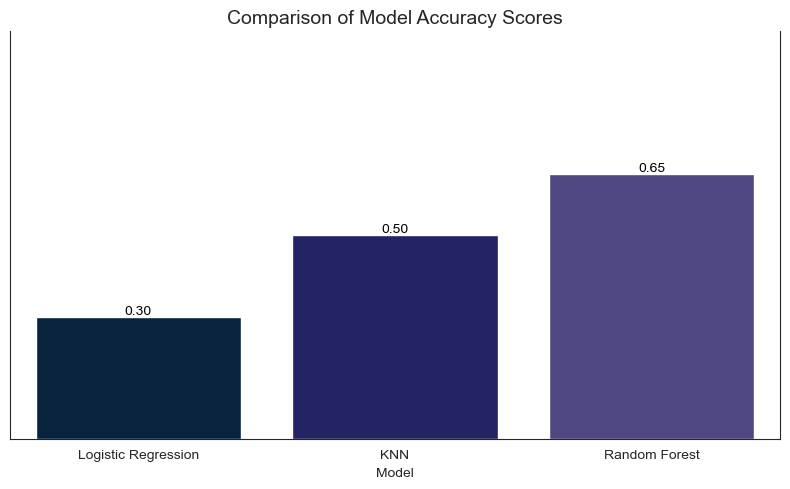

In [176]:

# Accuracy scores (replace with actual values)
log_reg_accuracy = 0.30
knn_accuracy = 0.50
rf_accuracy = 0.65  # update as needed

# Create a DataFrame
accuracy_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Random Forest'],
    'Accuracy': [log_reg_accuracy, knn_accuracy, rf_accuracy]
})

# Custom colors for each model
colors = ["#002147", "#191970", "#483D8B"]

# Set the style without grid
sns.set_style("white")

# Create the plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette=colors)

# Annotate bars with accuracy values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Set title and labels
ax.set_title('Comparison of Model Accuracy Scores', fontsize=14)
ax.set_xlabel('Model')
ax.set_ylabel('')

# Remove y-axis ticks and labels
ax.tick_params(left=False)
ax.set_yticklabels([])

# Control spines (borders)
ax.spines['top'].set_visible(False)      # Hide top
ax.spines['left'].set_visible(True)      # Show left
ax.spines['right'].set_visible(True)     # Show right
ax.spines['bottom'].set_visible(True)    # Show bottom

plt.ylim(0, 1)
plt.tight_layout()
plt.show()


# Conclusion:

In conclusion, our analysis revealed several key insights into the relationship between product features, brands, and sales performance. While battery life and camera quality showed slight positive correlations with user ratings, the overall correlations were weak, suggesting that other factors play a significant role. company A emerged as a major player, particularly in the smartphone category, while other brands exhibited varying degrees of success across different product segments.

The findings highlight the importance of understanding category-specific brand performance and focusing on features that resonate with users. By implementing the recommendations outlined above, businesses can make informed decisions to optimize product development, marketing strategies, and ultimately, enhance customer satisfaction and sales.


# Recommendation:

Based on the observed trends, particularly the strong correlation between battery life and user ratings, and the dominance of Brand A in the smartphone category, we recommend the following:

### Focus on Battery Life:
Prioritize improvements in battery life for all product categories, as this appears to be a key driver of positive user feedback.

### Capitalize on Company A's Smartphone Dominance: 
Leverage Company A's strong market share in the smartphone category to further expand its reach and influence. Consider strategies to maintain and enhance this dominance.

### Tailored Category Strategies:
Develop category-specific strategies for trusted gadget's, recognizing that different gadgets perform better in different product segments. For example, company D could focus on capitalizing on its strength in the smartwatch category.

### Explore Other Factors: 
Recognize that user ratings are influenced by factors beyond the features analyzed. Consider incorporating price, design, software, and user experience into future analyses.


